I want and staked plot to see the total number of games for each result of total goals there were in the Copa America and EuroCup in the last 50 years. use this csv :fifa_results.csv

In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


<ipython-input-3-3b086d7d3e05>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copa_euro['total_goals'] = df_copa_euro['home_score'] + df_copa_euro['away_score']


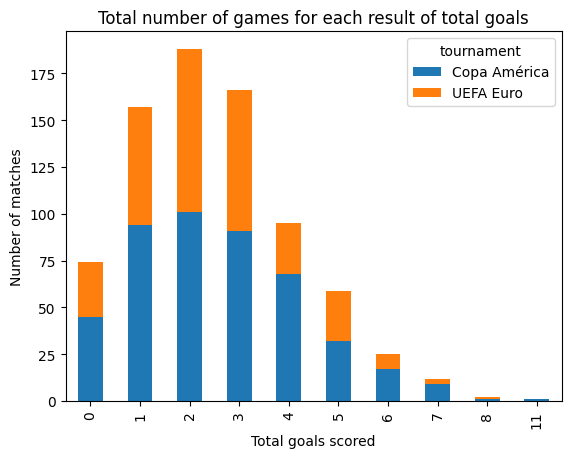

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV file into a Pandas DataFrame
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv'
df = pd.read_csv(data_file)
# parsing dates
df['date'] = pd.to_datetime(df['date'],errors='coerce',format='%Y-%m-%d')
df['Year'] = df['date'].dt.year
# Filter the DataFrame to include only data from the last 50 years and the Copa America and Eurocup tournament.
last_year = df['Year'].max()
df_copa_euro = df[(df['Year'] >= last_year - 49) & (df['tournament'].isin(['Copa América', 'UEFA Euro']))]

# Calculate the total goals scored in each match
df_copa_euro['total_goals'] = df_copa_euro['home_score'] + df_copa_euro['away_score']

# Count the number of matches with different numbers of total goals scored by tournament
total_goals_counts = df_copa_euro.groupby(['tournament', 'total_goals']).size().unstack(level=0, fill_value=0)

# Plot the data as a stacked bar chart
fig, ax = plt.subplots()
total_goals_counts.plot.bar(stacked=True, ax=ax)

# Set the title and axis labels
ax.set_title('Total number of games for each result of total goals')
ax.set_xlabel('Total goals scored')
ax.set_ylabel('Number of matches')

plt.show()